<a href="https://colab.research.google.com/github/Shah-in-alam/AI-Basic-to-Advance/blob/main/AI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

📌 Step 2: Load CIFAR-10 Dataset

In [2]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes


100%|██████████| 170M/170M [00:10<00:00, 15.8MB/s]


📌 Step 3: Define CNN Model

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),  # input: 3x32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # output: 32x16x16
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # output: 64x8x8
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

model = CNN().to(device)


📌 Step 4: Training the Model

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):  # 10 epochs
    running_loss = 0.0
    model.train()
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")


Epoch 1, Loss: 1.5254
Epoch 2, Loss: 1.1935
Epoch 3, Loss: 1.0376
Epoch 4, Loss: 0.9480
Epoch 5, Loss: 0.8866
Epoch 6, Loss: 0.8433
Epoch 7, Loss: 0.8031
Epoch 8, Loss: 0.7692
Epoch 9, Loss: 0.7411
Epoch 10, Loss: 0.7175


In [5]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 72.92%


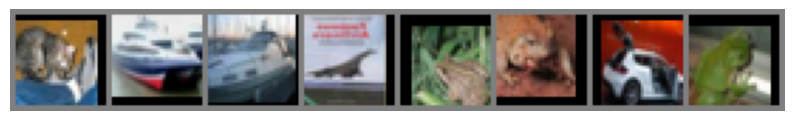

Predicted: ['cat', 'automobile', 'ship', 'airplane', 'deer', 'frog', 'automobile', 'bird']
Actual:    ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog']


In [6]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get a batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Predict
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images with predictions
imshow(torchvision.utils.make_grid(images.cpu()[:8]))
print("Predicted:", [classes[p.item()] for p in predicted[:8]])
print("Actual:   ", [classes[l.item()] for l in labels[:8]])


Saving Cat_November_2010-1a.jpg to Cat_November_2010-1a.jpg


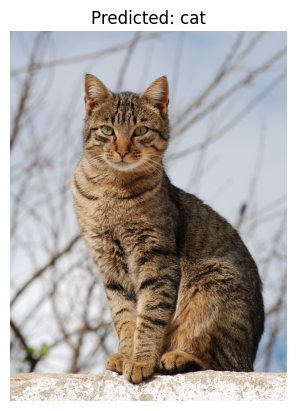

In [10]:
from PIL import Image
from google.colab import files

# Upload an image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load and preprocess image
image = Image.open(filename).convert('RGB')
transform_single = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform_single(image).unsqueeze(0).to(device)

# Predict
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, pred = torch.max(output, 1)
    label = classes[pred.item()]

# Show image and prediction
plt.imshow(image)
plt.title(f'Predicted: {label}')
plt.axis('off')
plt.show()


In [16]:
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image

# CIFAR-10 classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define the prediction function
def predict(image):
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)
        return f"Prediction: {classes[pred.item()]}"

# Launch Gradio interface
gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", sources=["upload"]),
    outputs="text",
    title="CIFAR-10 Webcam Classifier"
).launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fab716be1734e90ec9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [17]:
def predict_with_confidence(image):
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        probs = torch.nn.functional.softmax(output, dim=1)[0]

    results = {classes[i]: float(probs[i]) for i in range(10)}
    return results


In [18]:
gr.Interface(
    fn=predict_with_confidence,
    inputs=gr.Image(type="pil", label="Upload CIFAR-10 Image"),
    outputs=gr.Label(num_top_classes=3),
    title="CIFAR-10 Confidence Classifier"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c696b77ed5344b6489.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [19]:
def predict_and_draw(image):
    original = image.copy()
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)
        label = classes[pred.item()]

    # Draw label on the original image
    import PIL.ImageDraw as ImageDraw
    draw = ImageDraw.Draw(original)
    draw.text((10, 10), f"Prediction: {label}", fill=(255, 0, 0))
    return original


In [20]:
gr.Interface(
    fn=predict_and_draw,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil"),
    title="CIFAR-10 Visual Classifier"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://914b6b1790a2b050a1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [25]:
def predict_batch(files):
    results = {}
    for file in files:
        try:
            image = Image.open(file).convert("RGB")
            image_tensor = transform(image).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(image_tensor)
                _, pred = torch.max(output, 1)
                results[file.name] = classes[pred.item()]
        except Exception as e:
            results[file.name] = f"Error: {e}"
    return results




In [26]:
gr.Interface(
    fn=predict_batch,
    inputs=gr.Files(file_types=["image"], label="Upload Multiple Images"),
    outputs="json",
    title="CIFAR-10 Batch Classifier"
).launch()




It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f27aca2ca2caf5e9d9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
